Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading csv file of dataset of website

In [17]:
df = pd.read_csv("data-export (1).csv") #Load the dataset

In [18]:
df.head() # Display the first few rows of the dataset

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Data Cleaning 

In [25]:
df.columns = df.iloc[0] # Set the first row as the header
df = df.drop(index=0).reset_index(drop = True) # Drop the first row which is now redundant
df.columns = ["Channel Group", 
              "DateHour",
               "Users", 
               "Sessions", "Engaged Sessions",
                "Average Engagement Time Per Session",
                "Engaged Sessions Per User", 
                "Events Per Session",
                "Engagement Rate", 
                "Event Count"] # Rename the columns for easier access

In [26]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count
0,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
1,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
2,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
3,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
4,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779


In [27]:
df.info() # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3179 non-null   object
 1   DateHour                             3179 non-null   object
 2   Users                                3179 non-null   object
 3   Sessions                             3179 non-null   object
 4   Engaged Sessions                     3179 non-null   object
 5   Average Engagement Time Per Session  3179 non-null   object
 6   Engaged Sessions Per User            3179 non-null   object
 7   Events Per Session                   3179 non-null   object
 8   Engagement Rate                      3179 non-null   object
 9   Event Count                          3179 non-null   object
dtypes: object(10)
memory usage: 248.5+ KB


In [39]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce') # Convert the DateHour column to datetime format
numeric_columns = df.columns.drop(["Channel Group", "DateHour"]) # Select numeric columns for conversion
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce') # Convert numeric columns to numeric type
df["Hour"]= df["DateHour"].dt.hour # Extract the hour from the DateHour column

In [40]:
df.info() # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3179 non-null   object        
 1   DateHour                             3179 non-null   datetime64[ns]
 2   Users                                3179 non-null   int64         
 3   Sessions                             3179 non-null   int64         
 4   Engaged Sessions                     3179 non-null   int64         
 5   Average Engagement Time Per Session  3179 non-null   float64       
 6   Engaged Sessions Per User            3179 non-null   float64       
 7   Events Per Session                   3179 non-null   float64       
 8   Engagement Rate                      3179 non-null   float64       
 9   Event Count                          3179 non-null   int64         
 10  Hour        

In [43]:
df.describe() # Display summary statistics of the DataFrame

,DateHour,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Hour
count,3179,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,2024-01-16 19:29:55.659012352,41.776345,50.989305,28.229317,66.669863,0.606439,4.676117,0.503410,241.363007,11.797735
min,2024-01-01 00:05:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-01-10 02:04:00,20.000000,24.000000,13.000000,32.091250,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-01-17 01:04:00,42.000000,51.000000,27.000000,49.096154,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-01-24 00:34:00,60.000000,71.000000,41.000000,71.518519,0.750000,5.218981,0.633333,339.000000,18.000000
max,2024-01-30 23:04:00,187.000000,256.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,29.129828,36.328970,20.417710,127.257871,0.264147,2.796538,0.228313,182.081506,6.883023


## Data Visualisation And Insight Generation

Q1 What pattern or trends can you observe in website sessions and users over time ?

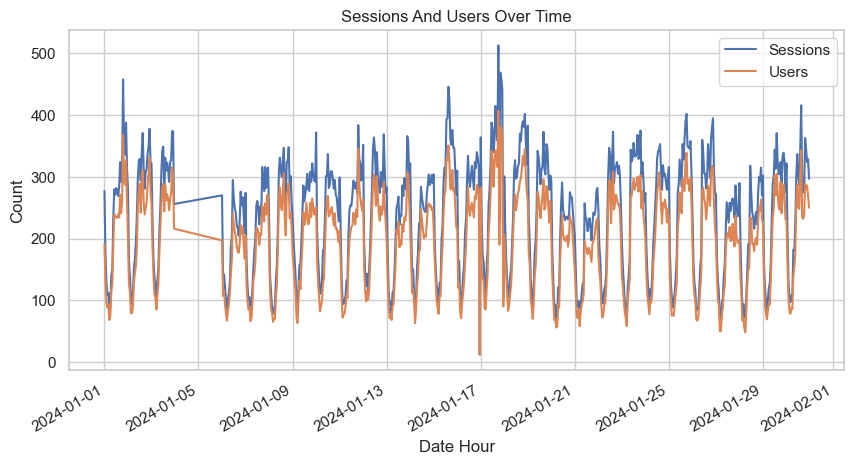

In [48]:
sns.set(style="whitegrid") # Set the style for seaborn plots
plt.figure(figsize=(10, 5)) # Set the figure size for the plot
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca()) # Group by DateHour and plot the sum of Sessions and Users
plt.title("Sessions And Users Over Time") # Set the title of the plot
plt.xlabel("Date Hour") # Set the x-axis label
plt.ylabel("Count") # Set the y-axis label
plt.show() # Display the plot

the time series visualization indicates a consistent cyclical pattern in user engagement, with distinct daily fluctuations in both sessions and users from January 1 to February 1, 2024. Sessions consistently exceed user counts, aligning with expected behavior where users initiate multiple sessions. The data reflects stable platform activity over the month, suggesting a loyal and active user base. A noticeable anomaly around January 5–6 likely points to data collection issues or system downtime, warranting further investigation. These insights can help inform decisions on peak hour optimization, resource allocation, and anomaly handling for improved platform performance and user experience.

Q2 Which marketing channel brought the highest number of users to the website , and how can we use this insights to improve traffic from other sources ?

C:\Users\acer\AppData\Local\Temp\ipykernel_5148\1648324003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis") # Create a bar plot for Users by Channel Group


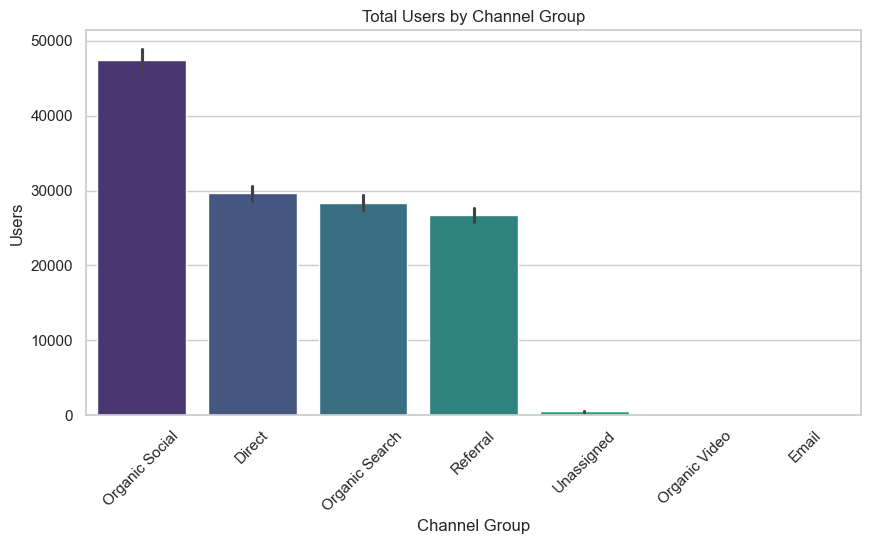

In [50]:
plt.figure(figsize=(10, 5)) # Set the figure size for the plot
sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis") # Create a bar plot for Users by Channel Group
plt.title("Total Users by Channel Group") # Set the title of the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show() # Display the plot

The bar chart reveals that Organic Social is the leading marketing channel, bringing in the highest number of users—approximately 48,000+, significantly outperforming all other channels such as Direct, Organic Search, and Referral. As a Data Analyst and Business Analyst, this indicates strong audience engagement through social media platforms, likely driven by effective content strategies or influencer campaigns. To leverage this insight, we can analyze the specific tactics and platforms contributing to this success and replicate similar approaches across underperforming channels like Email, Organic Video, and Unassigned. Additionally, reallocating marketing budget, optimizing SEO, and running A/B tests on direct and referral campaigns can help balance traffic distribution and improve overall acquisition performance.

Q3 Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness ?

In [51]:
df.head() 

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Hour
0,Organic Social,2024-01-17 18:04:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-01-17 20:04:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-01-17 21:04:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-01-01 19:05:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-01-16 22:04:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


C:\Users\acer\AppData\Local\Temp\ipykernel_5148\362703636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Average Engagement Time Per Session", estimator=np.mean, palette="magma") # Create a bar plot for Average Engagement Time Per Session by Channel Group


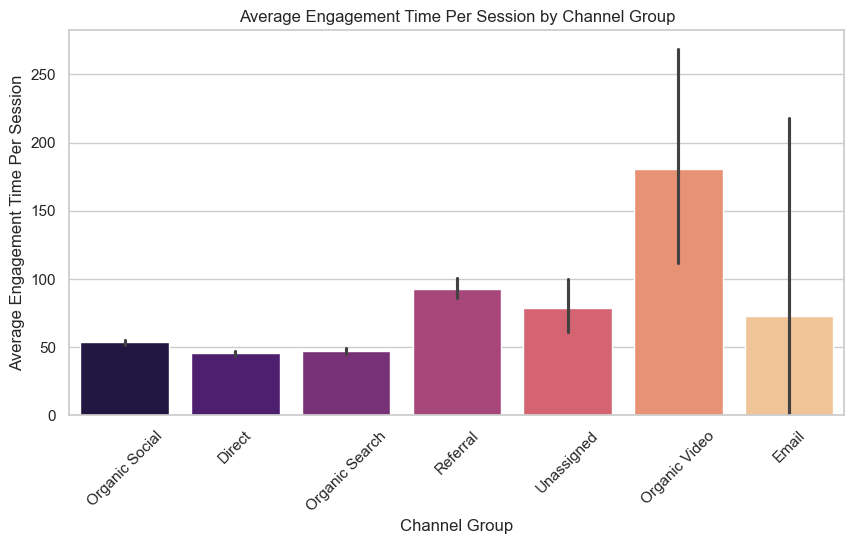

In [55]:
plt.figure(figsize=(10, 5)) # Set the figure size for the plot
sns.barplot(data=df, x="Channel Group", y="Average Engagement Time Per Session", estimator=np.mean, palette="magma") # Create a bar plot for Average Engagement Time Per Session by Channel Group
plt.title("Average Engagement Time Per Session by Channel Group") # Set the title of the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show() # Display the plot

The bar chart shows that Organic Video has the highest average engagement time per session, significantly outperforming other channels with an average close to 180 seconds, this suggests that video content is highly engaging and retains user attention longer, indicating its effectiveness in delivering value or entertainment. Although it may not bring the highest volume of users, the depth of interaction implies stronger user interest and potential for conversion. To capitalize on this, businesses should consider investing more in high-quality video content, promoting it across other channels, and using insights from video engagement to improve less effective content formats on platforms like Organic Social or Direct traffic.

Q4 How does engagement rate vary across different traffic channels?

C:\Users\acer\AppData\Local\Temp\ipykernel_5148\2902841179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel Group", y="Engagement Rate", palette="coolwarm") # Create a box plot for Engagement Rate by Channel Group


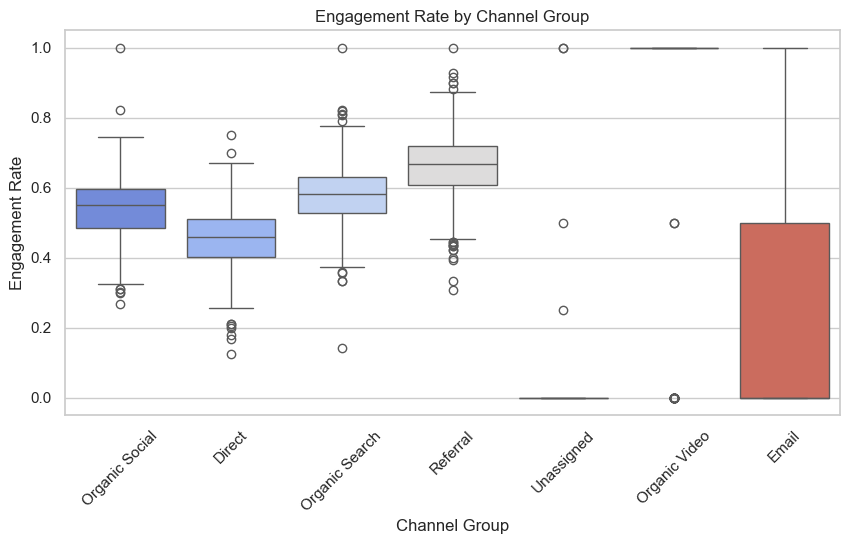

In [56]:
plt.figure(figsize=(10, 5)) # Set the figure size for the plot
sns.boxplot(data=df, x="Channel Group", y="Engagement Rate", palette="coolwarm") # Create a box plot for Engagement Rate by Channel Group
plt.title("Engagement Rate by Channel Group") # Set the title of the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show() # Display the plot

The box plot illustrates that Referral and Organic Search channels exhibit the highest median engagement rates, generally clustering around 0.6 to 0.7, suggesting users from these sources are highly interactive and likely more qualified or intent-driven.This indicates strong content relevance and user intent alignment on these channels. In contrast, Unassigned and Email show wide variability and low median engagement, pointing to inconsistency or misalignment in targeting or content delivery. Organic Video, despite fewer data points, displays near-perfect engagement in some instances. These insights can guide marketing teams to optimize campaigns—focusing on refining messaging in low-performing channels and replicating effective strategies from high-engagement sources to improve overall user interaction and conversion potential.

Q5 Which channels are driving more engagement sessions compared to non engaged ones , what strategies can improve engagement in underperforming channels ?

In [57]:
df.head() # Display the first few rows of the DataFrame again to confirm changes

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Hour
0,Organic Social,2024-01-17 18:04:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-01-17 20:04:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-01-17 21:04:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-01-01 19:05:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-01-16 22:04:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


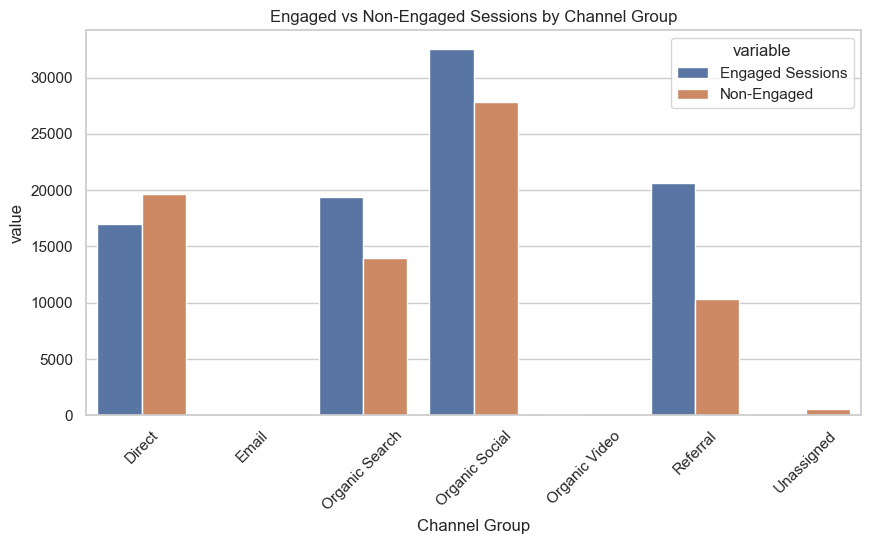

In [60]:
sessions_df = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index() # Group by DateHour and sum Sessions and Users
sessions_df["Non-Engaged"] = sessions_df["Sessions"] - sessions_df["Engaged Sessions"] # Calculate Non-Engaged Sessions
sessions_df_melted = sessions_df.melt(id_vars="Channel Group", value_vars=["Engaged Sessions", "Non-Engaged"])
plt.figure(figsize=(10, 5)) # Set the figure size for the plot
sns.barplot(data=sessions_df_melted, x="Channel Group", y="value", hue="variable") # Create a bar plot for Engaged and Non-Engaged Sessions by Channel Group
plt.title("Engaged vs Non-Engaged Sessions by Channel Group") # Set the title of the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show() # Display the plot

The bar chart indicates that **Organic Social**, **Referral**, and **Organic Search** channels are driving more **engaged sessions** than non-engaged ones, highlighting the effectiveness of these sources in attracting quality traffic.This suggests these channels successfully deliver content that resonates with users, possibly through targeted campaigns or high-value offerings. In contrast, **Email** and **Direct** traffic show higher or comparable non-engaged session volumes, signaling a need for improvement. To boost engagement in these underperforming channels, strategies could include personalized email content, optimized landing pages for direct visitors, A/B testing of CTAs, and re-targeting campaigns. Additionally, aligning messaging with user intent and improving user experience can further convert passive sessions into active, engaged ones.


Q6 At What hours of the day does each channel drive the most traffic ?

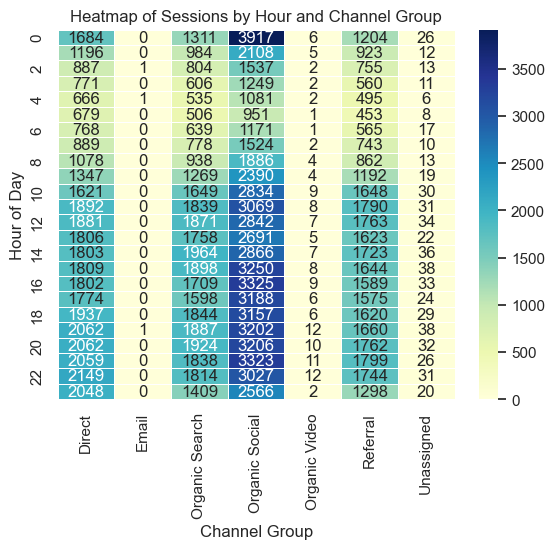

In [61]:
heatmap_data = df.groupby(['Hour', "Channel Group"])["Sessions"].sum().unstack().fillna(0) # Create a pivot table for Sessions by Channel Group and Hour

plt.figure(figure=(12,6)) # Set the figure size for the heatmap
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f") # Create a heatmap for Sessions by Channel Group and Hour
plt.title("Heatmap of Sessions by Hour and Channel Group") # Set the title of the heatmap
plt.xlabel("Channel Group") # Set the x-axis label
plt.ylabel("Hour of Day") # Set the y-axis label
plt.show() # Display the heatmap

The heatmap reveals that **Organic Social** consistently drives the most traffic throughout the day, peaking during late morning and evening hours (12 PM–2 PM and 6 PM–10 PM), indicating strong user activity during lunch and post-work hours. **Organic Search** sees heightened traffic between 10 AM and 4 PM, suggesting users actively seek information during work hours. **Direct** traffic follows a similar pattern with moderate consistency throughout the day, peaking between 12 PM and 2 PM. **Referral** traffic also spikes during the same periods as Organic Search, showing dependency on active web browsing periods. In contrast, **Email** and **Organic Video** channels generate negligible traffic across all hours, signaling either underutilization or ineffective campaign strategies. As a Data and Business Analyst, this insight highlights the importance of timing in content delivery—optimizing campaigns and publishing schedules during peak hours can significantly enhance traffic and engagement for each channel.


Q7 Is there any correlation between high traffic(sessions) and high engagement rate over time?

In [63]:
df.head() # Display the first few rows of the DataFrame again to confirm changes

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Hour
0,Organic Social,2024-01-17 18:04:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-01-17 20:04:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-01-17 21:04:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-01-01 19:05:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-01-16 22:04:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


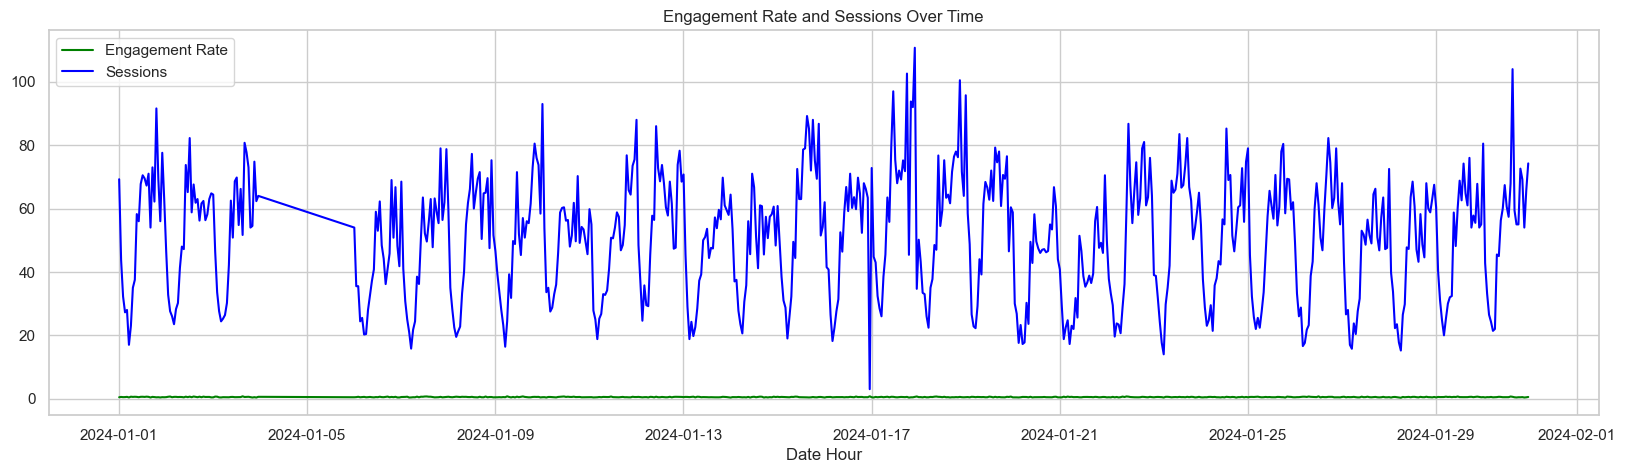

In [69]:
df_plot = df.groupby("DateHour")[["Engagement Rate", "Sessions"]].mean().reset_index() # Group by DateHour and sum relevant columns
plt.figure(figsize=(20, 5)) # Set the figure size for the plot
plt.plot(df_plot["DateHour"], df_plot["Engagement Rate"], label="Engagement Rate", color="green") # Plot Engagement Rate over time
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue") # Plot Sessions over time
plt.title("Engagement Rate and Sessions Over Time") # Set the title of the plot
plt.xlabel("Date Hour") # Set the x-axis label
plt.legend() # Show the legend
plt.grid(True) # Show grid lines
plt.show() # Display the plot

The line graph comparing Engagement Rate (green) and Sessions (blue) over time indicates no strong correlation between high traffic and high engagement rates. While session volume fluctuates significantly—often showing daily spikes—engagement rate remains relatively flat with minor variations throughout the month. This suggests that increased traffic doesn't necessarily lead to more meaningful user engagement.

This insight is critical: it emphasizes the need to not just focus on attracting more users but also optimizing content quality, user experience, and targeting strategies to drive true engagement. Investing in A/B testing, behavioral segmentation, and content relevance could help convert volume into value.